In [2]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import os
import joblib
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, VotingClassifier, StackingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
import xgboost as xgb
from catboost import CatBoostClassifier

In [5]:
data = pd.read_csv("Dataset/data.csv")
data = data.dropna()

In [3]:
# Checking for any null values if present
data.isnull().sum()

android.permission.GET_ACCOUNTS                                           0
com.sonyericsson.home.permission.BROADCAST_BADGE                          0
android.permission.READ_PROFILE                                           0
android.permission.MANAGE_ACCOUNTS                                        0
android.permission.WRITE_SYNC_SETTINGS                                    0
                                                                         ..
com.google.android.finsky.permission.BIND_GET_INSTALL_REFERRER_SERVICE    0
com.huawei.android.launcher.permission.READ_SETTINGS                      0
android.permission.READ_SMS                                               0
android.permission.PROCESS_INCOMING_CALLS                                 0
Result                                                                    0
Length: 87, dtype: int64

Result
Malware    16669
Benign     15175
Name: count, dtype: int64


C:\Users\Xuan Lan\AppData\Local\Temp\ipykernel_9732\1793369578.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x=data['Result'], palette=['#1f77b4', '#ff7f0e'])


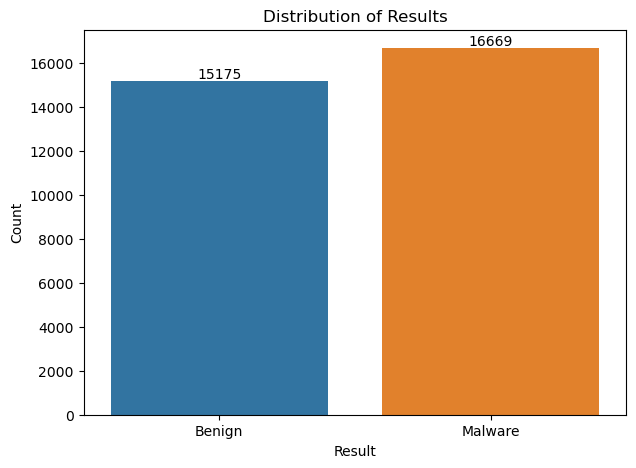

In [7]:
# Load dataset
import matplotlib.pyplot as plt
import seaborn as sns

# Thay thế giá trị 0 thành 'Benign' và 1 thành 'Malware'
data['Result'] = data['Result'].replace({0: 'Benign', 1: 'Malware'})

# Kiểm tra phân phối của cột 'Result'
print(data['Result'].value_counts())

# Vẽ biểu đồ
plt.figure(figsize=(7, 5), dpi=100)
ax = sns.countplot(x=data['Result'], palette=['#1f77b4', '#ff7f0e'])

# Thêm số đếm trên các cột
for p in ax.patches:
    ax.annotate(f"{int(p.get_height())}", 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', fontsize=10, color='black', 
                xytext=(0, 5), textcoords='offset points')

# Thêm tiêu đề và nhãn trục
plt.title('Distribution of Results')
plt.xlabel('Result')
plt.ylabel('Count')

# Hiển thị biểu đồ
plt.show()


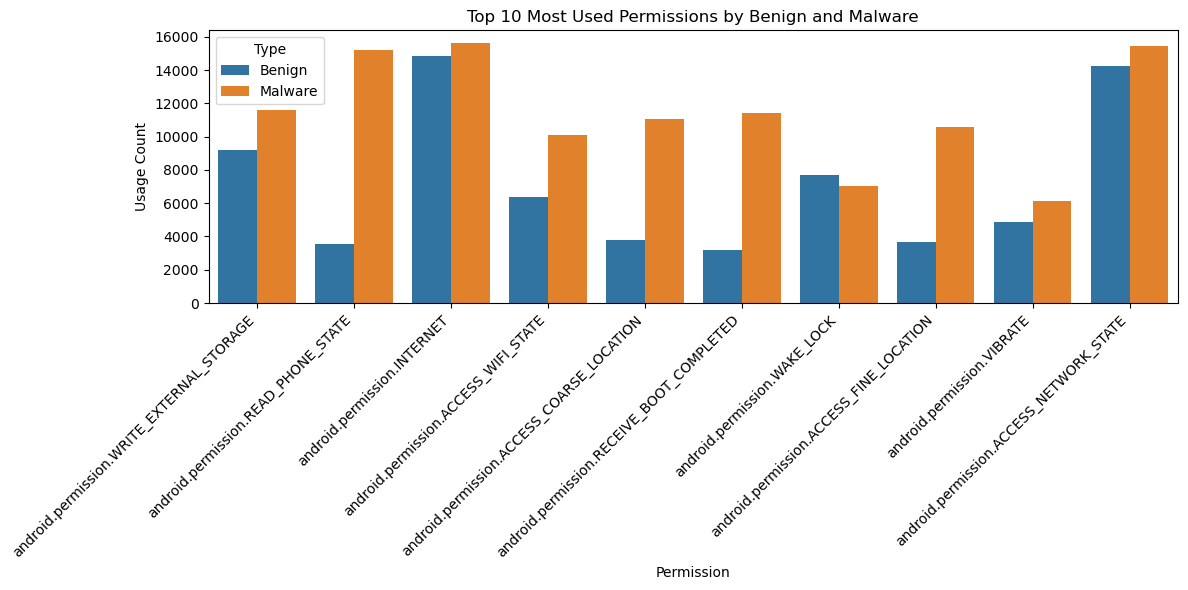

In [10]:

data['Result'] = data['Result'].replace({0: 'Benign', 1: 'Malware'})

benign_counts = data[data['Result'] == 'Benign'].iloc[:, :-1].sum()
malware_counts = data[data['Result'] == 'Malware'].iloc[:, :-1].sum()

permission_summary = pd.DataFrame({
    'Permission': data.columns[:-1],  
    'Benign': benign_counts.values,
    'Malware': malware_counts.values
})

permission_summary = permission_summary.melt(
    id_vars='Permission',
    var_name='Type',
    value_name='Count'
)

top_permissions = permission_summary.groupby('Permission')['Count'].sum().nlargest(10).index
permission_summary = permission_summary[permission_summary['Permission'].isin(top_permissions)]

plt.figure(figsize=(12, 6), dpi=100)
sns.barplot(
    data=permission_summary,
    x='Permission',
    y='Count',
    hue='Type',
    palette=['#1f77b4', '#ff7f0e']
)

# Thêm tiêu đề và nhãn trục
plt.title('Top 10 Most Used Permissions by Benign and Malware')
plt.xlabel('Permission')
plt.ylabel('Usage Count')
plt.xticks(rotation=45, ha='right')

# Hiển thị biểu đồ
plt.tight_layout()
plt.show()


In [1]:
# Section 1: Import Libraries and Load Data
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import os
import joblib
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, VotingClassifier, StackingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
import xgboost as xgb
from catboost import CatBoostClassifier
import time  # Add time to measure execution

# Load dataset
data = pd.read_csv("Dataset/data.csv")
data = data.dropna()

# Separate features and target
X = data.drop("Result", axis=1)  # Replace 'Result' with your actual target column name
y = data["Result"]

# Encode target if it is categorical
if y.dtype == 'object':
    lb = LabelEncoder()
    y = lb.fit_transform(y)

# Section 3: Split Data into Train and Test Sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training set shape:", X_train.shape)
print("Testing set shape:", X_test.shape)

# Section 4: Train, Evaluate, and Save Models
classifiers = {
    "SVM": SVC(),  
    "Random Forest": RandomForestClassifier(random_state=50, criterion="entropy"),
    "Decision Tree": DecisionTreeClassifier(criterion="entropy", random_state=100),
    "XGBoost": xgb.XGBClassifier(eval_metric='logloss', random_state=100, learning_rate=0.1),  
    "CatBoost": CatBoostClassifier(silent=True, random_state=100, learning_rate=0.1, eval_metric='Logloss')  
}



# Train, evaluate, and save each classifier
results = {}
for name, clf in classifiers.items():
    start_time = time.time()  # Start timing
    clf.fit(X_train, y_train)
    end_time = time.time()  # End timing
    
    # Predict and evaluate
    y_pred = clf.predict(X_test)
    training_time = round(end_time - start_time, 2)  # Calculate training time
    
    # Evaluate the model
    results[name] = {
        "Accuracy": accuracy_score(y_test, y_pred),
        "Precision": precision_score(y_test, y_pred, average="weighted"),
        "Recall": recall_score(y_test, y_pred, average="weighted"),
        "F1 Score": f1_score(y_test, y_pred, average="weighted"),
        "Training Time (s)": training_time  # Add training time to results
    }
    
    # Save the model
    model_filename = os.path.join(model_dir, f"{name}.joblib")
    joblib.dump(clf, model_filename)
    print(f"Model {name} saved to {model_filename}")

# Create a directory to save models (if it doesn't exist)
model_dir = "saved_models_Dataset_Final"
os.makedirs(model_dir, exist_ok=True)

# Display results sorted by Accuracy
results_df = pd.DataFrame(results).T.sort_values(by="Accuracy", ascending=False)
print(results_df)

# Function to plot confusion matrix
def plot_confusion_matrix(y_true, y_pred, model_name, classes):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=classes, yticklabels=classes)
    plt.title(f'Confusion Matrix for {model_name}')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.show()

# Section 5: Plot Confusion Matrices for Each Classifier
for name, clf in classifiers.items():
    y_pred = clf.predict(X_test)
    
    if 'lb' in globals():
        classes = lb.classes_
    else:
        classes = sorted(set(y_test))

    plot_confusion_matrix(y_test, y_pred, name, classes)

Training set shape: (25475, 86)
Testing set shape: (6369, 86)


NameError: name 'model_dir' is not defined

Training set shape: (25475, 86)
Testing set shape: (6369, 86)
Model SVM saved to saved_models_Dataset_Final\SVM.joblib
Model Random Forest saved to saved_models_Dataset_Final\Random Forest.joblib
Model Decision Tree saved to saved_models_Dataset_Final\Decision Tree.joblib
Model XGBoost saved to saved_models_Dataset_Final\XGBoost.joblib
Model CatBoost saved to saved_models_Dataset_Final\CatBoost.joblib
Model Voting Classifier saved to saved_models_Dataset_Final\Voting Classifier.joblib
Model Stacking Classifier saved to saved_models_Dataset_Final\Stacking Classifier.joblib
                     Accuracy  Precision    Recall  F1 Score  \
Stacking Classifier  0.973779   0.973828  0.973779  0.973783   
CatBoost             0.973308   0.973366  0.973308  0.973313   
Random Forest        0.972837   0.972886  0.972837  0.972841   
Voting Classifier    0.972837   0.972880  0.972837  0.972841   
XGBoost              0.968598   0.968598  0.968598  0.968598   
Decision Tree        0.967970   0.968

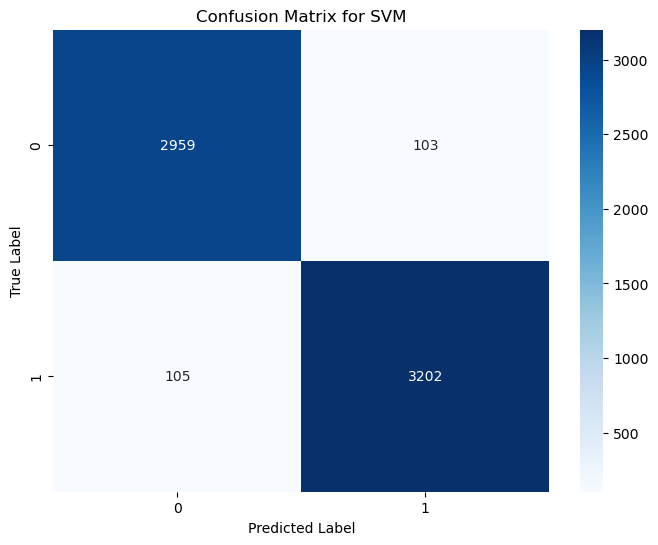

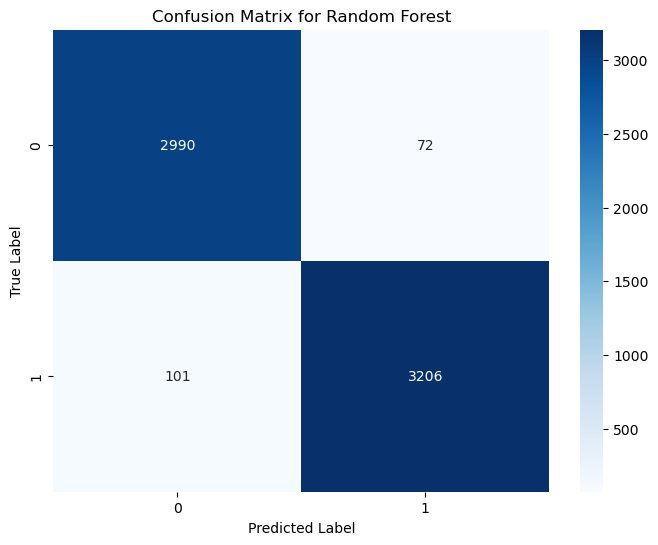

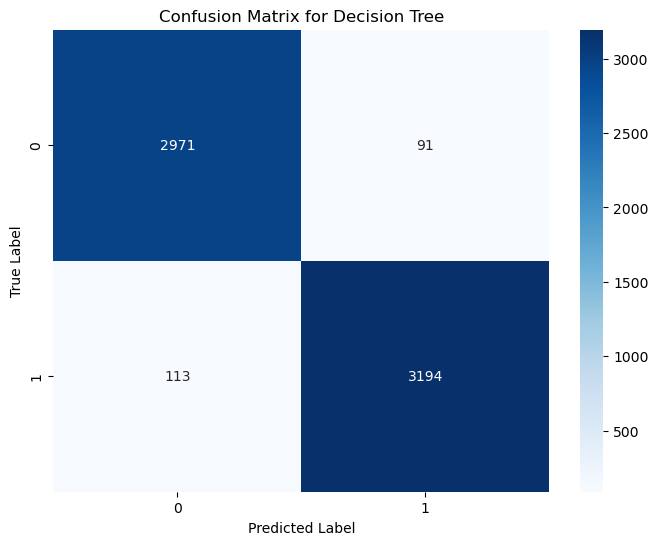

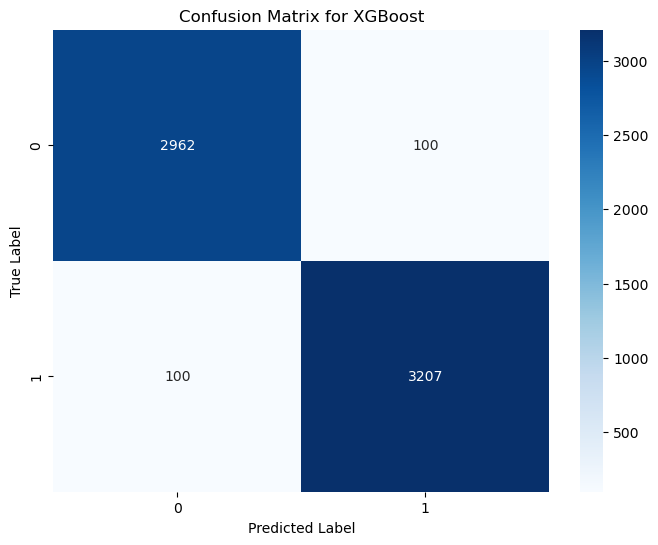

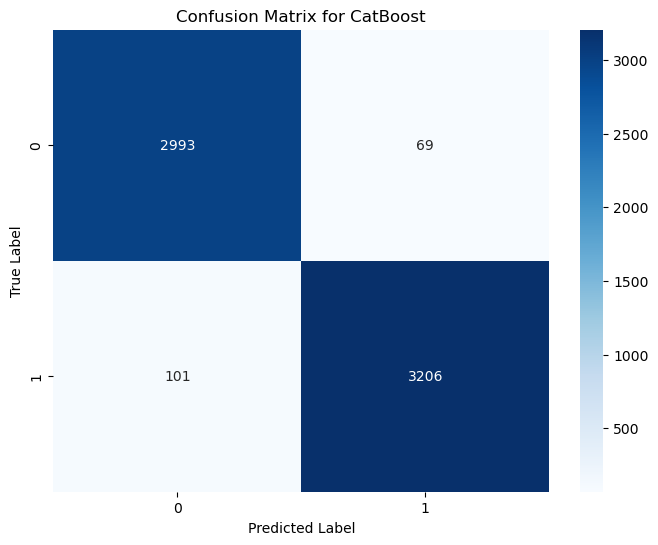

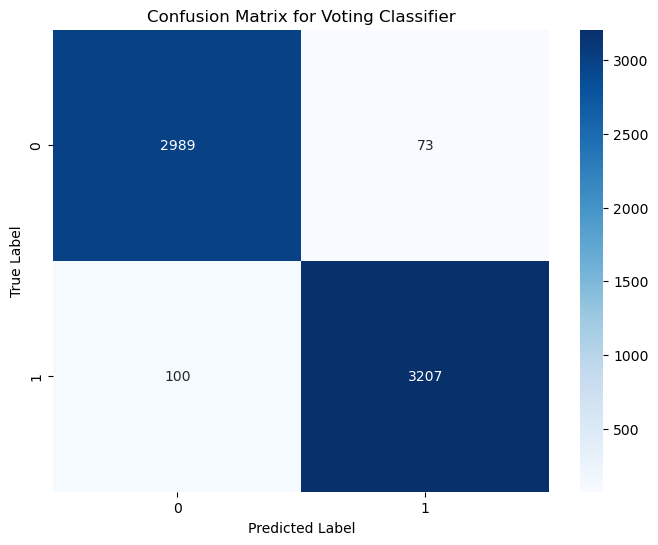

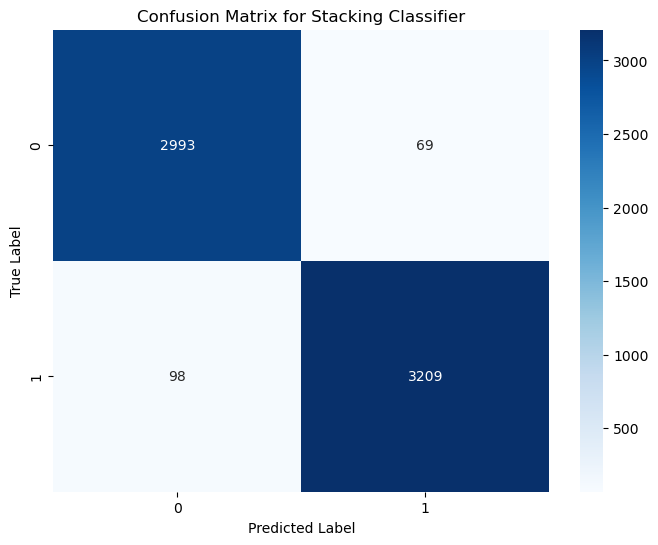

In [2]:
# Section 1: Import Libraries and Load Data
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import os
import joblib
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, VotingClassifier, StackingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
import xgboost as xgb
from catboost import CatBoostClassifier
import time  # Add time to measure execution

# Load dataset
data = pd.read_csv("Dataset/data.csv")
data = data.dropna()

# Separate features and target
X = data.drop("Result", axis=1)  # Replace 'Result' with your actual target column name
y = data["Result"]

# Encode target if it is categorical
if y.dtype == 'object':
    lb = LabelEncoder()
    y = lb.fit_transform(y)

# Section 3: Split Data into Train and Test Sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training set shape:", X_train.shape)
print("Testing set shape:", X_test.shape)

# Section 4: Train, Evaluate, and Save Models
classifiers = {
    "SVM": SVC(),  
    "Random Forest": RandomForestClassifier(random_state=50, criterion="entropy"),
    "Decision Tree": DecisionTreeClassifier(criterion="entropy", random_state=100),
    "XGBoost": xgb.XGBClassifier(eval_metric='logloss', random_state=100, learning_rate=0.1),  
    "CatBoost": CatBoostClassifier(silent=True, random_state=100, learning_rate=0.1, eval_metric='Logloss')  
}

voting_clf = VotingClassifier(estimators=[
    ('rf', RandomForestClassifier(random_state=40)),
    ('xgb', xgb.XGBClassifier(eval_metric='logloss', random_state=40, learning_rate=0.1)),  
    ('catboost', CatBoostClassifier(silent=True, random_state=40, learning_rate=0.1, eval_metric='Logloss'))  
], voting='hard')

stacking_clf = StackingClassifier(
    estimators=[
        ('lr', LogisticRegression(max_iter=500)),
        ('svm', SVC(probability=True)),  
        ('xgb', xgb.XGBClassifier(eval_metric='logloss', random_state=40)),  
        ('catboost', CatBoostClassifier(silent=True, random_state=40, eval_metric='Logloss')) 
    ],
    final_estimator=LogisticRegression()
)

# Add ensemble classifiers to the dictionary
classifiers['Voting Classifier'] = voting_clf
classifiers['Stacking Classifier'] = stacking_clf

# Create a directory to save models (if it doesn't exist)
model_dir = "saved_models_Dataset_Final"
os.makedirs(model_dir, exist_ok=True)

# Train, evaluate, and save each classifier
results = {}
for name, clf in classifiers.items():
    start_time = time.time()  # Start timing
    clf.fit(X_train, y_train)
    end_time = time.time()  # End timing
    
    # Predict and evaluate
    y_pred = clf.predict(X_test)
    training_time = round(end_time - start_time, 2)  # Calculate training time
    
    # Evaluate the model
    results[name] = {
        "Accuracy": accuracy_score(y_test, y_pred),
        "Precision": precision_score(y_test, y_pred, average="weighted"),
        "Recall": recall_score(y_test, y_pred, average="weighted"),
        "F1 Score": f1_score(y_test, y_pred, average="weighted"),
        "Training Time (s)": training_time  # Add training time to results
    }
    
    # Save the model
    model_filename = os.path.join(model_dir, f"{name}.joblib")
    joblib.dump(clf, model_filename)
    print(f"Model {name} saved to {model_filename}")

# Display results sorted by Accuracy
results_df = pd.DataFrame(results).T.sort_values(by="Accuracy", ascending=False)
print(results_df)

# Function to plot confusion matrix
def plot_confusion_matrix(y_true, y_pred, model_name, classes):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=classes, yticklabels=classes)
    plt.title(f'Confusion Matrix for {model_name}')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.show()

# Section 5: Plot Confusion Matrices for Each Classifier
for name, clf in classifiers.items():
    y_pred = clf.predict(X_test)
    
    if 'lb' in globals():
        classes = lb.classes_
    else:
        classes = sorted(set(y_test))

    plot_confusion_matrix(y_test, y_pred, name, classes)